# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# открываем файл из директории или по ссылке используя try - except
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')                   

In [3]:
# Посмотрим на первые 10 строк (заметно много NAN в колонке ceiling_height и is_apartment)
pd.set_option('display.max_columns', None)
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:  </b>
<br>
    у меня вроде все нормально, просто есть горизональная линия прокрутки. Но добавил эту команду, надеюсь туда, куда надо
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Лучше добавить в самую первую ячейку)
</div>

In [4]:
# Посмотрим какие колонки есть и в каком формате (3 колонки в формате "object" настораживают)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных:

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — общая площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

In [5]:
# Поправим стилистическую ошибку: переименуем столбец 'cityCenters_nearest' в "питон_стайл":
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

In [6]:
# посмотрим основные статистические характеристики (мин, макс, среднее, медиану и тд), используем .T для транспонирования
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [7]:
# проверим наличие дубликатов
data.duplicated().sum()

0

In [8]:
# проверим долю пропусков
data['% NaN'] = data.apply(lambda x: x.isnull().sum() / len(x), axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,% NaN
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.136364
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.181818
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.090909
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.181818
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.090909


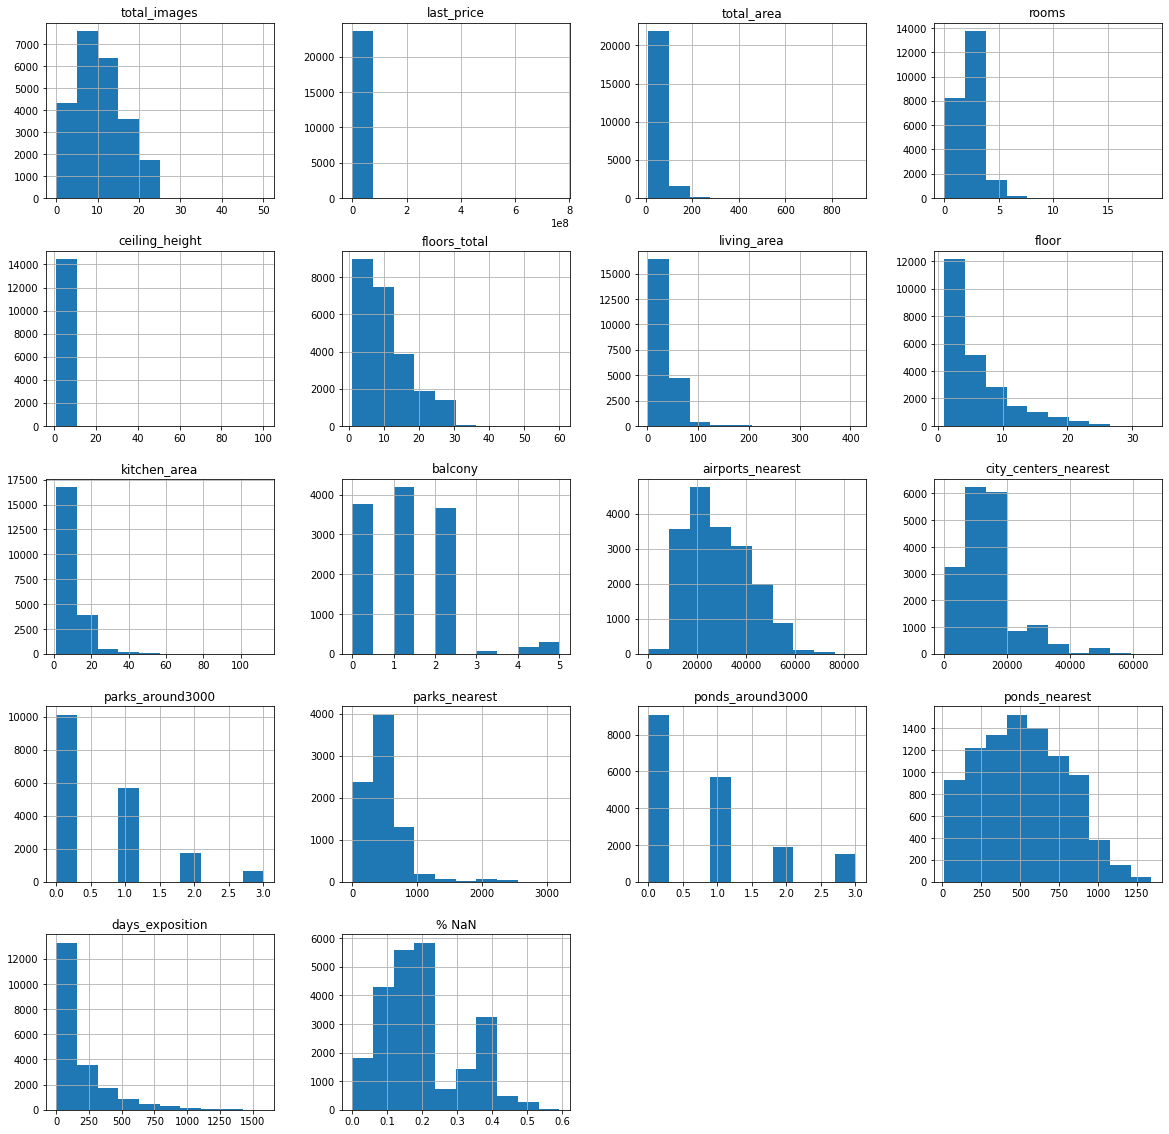

In [9]:
# Посмотрим гистаграммы каждого столбца
data.hist(figsize=(20, 20))
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

Вывод
Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

**Вывод на основе описательных данных:**

*last_price:* минимальная цена квартиры 12190 руб., что явно мало для рынка Санкт-Петербурга и Ленинградской области. Скорее всего это ошибка. Максимальная цена 763 000 000 руб. кажется довольно высокой, но в элитной недвижимости возможно всё. Тут еще вопрос не в абсолютной цене недвижимости, а в цене за метр. Элитная недвижимость это все-таки в большинстве не студия в 20 метров, а что-то от 100. Поэтому и высокая цена "максимума" может означать большую площадь этой недвижимости

*rooms:* минимальное число комнат 0 - ошибка. Как вариант это может быть квартира-студия. Нужно проверять. "Студийность" можно примерно понять по площади (студии это жилье с как правило 15-25 метров общей площади)

*ceiling_height:* минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка. Такие значения нужно удалять или корректировать.

*floors_total:* max количество этажей 60 похоже на ошибку, однако есть и высотные здания (Лахта центр 88 этажей по википедии)

*living_area:* min жилая площадь 2 м² невозможна, ошибка. Такие объекты лучше удалять или скорректировать

*kitchen_area:* min площадь кухни 1,3 м² невозможна, ошибка. Такие объекты лучше удалять.

*airports_nearest:* min расстояние до аэропорта 0 м. 3 варианта событий: либо нет данных и заполнили нулем, либо ошибка, либо это аэропорт. Может ли продаваться жилье в аэропорту? Маловероятно (можно конечно посмотреть адрес). Такие объекты лучше удалять.

*days_exposition:* минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - вариант возможноый. Максимум в  - 1580 дней (больше 4-х лет) довольно долго, но всякое бывает.

**Подитог:** часть данных есть смысл удалить, часть поправить, а вместо "среднего" использовать медиану, как мене чувствительную меру при наличии выбросов и просто "ненормального" распределения



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

**Удаление "бракованных" данных**
На этапе предобработки данных нам прийдется избавляться от части строк дата-фрейма  (выбросы, неполные, некорректные данные и т.п.). Какой объем данных нам не принципиально будет потерять? Некритичным предполагаю потерю до 10% данных



In [10]:
# Посчитаем
for i in [5, 10, 15]:
    print(i, '% это', int(len(data)*i/100),'строк.\n')

5 % это 1184 строк.

10 % это 2369 строк.

15 % это 3554 строк.



#### Работа с пропусками

In [11]:
# Посмотрим еще раз, в каких столбцах наших данных есть пропуски и оценим их количество, абсолютное и относительное:
n = 0
for column in data.columns:
    if data[column].isna().sum() > 0:
        na = data[column].isna().sum()
        print('Столбец:', data.columns[n], na, 100*na/len(data))        
    n += 1

Столбец: ceiling_height 9195 38.799105447487236
Столбец: floors_total 86 0.36288450989493226
Столбец: living_area 1903 8.029874678256467
Столбец: is_apartment 20924 88.2906451749019
Столбец: kitchen_area 2278 9.612219924891345
Столбец: balcony 11519 48.605426389299126
Столбец: locality_name 49 0.2067597788936242
Столбец: airports_nearest 5542 23.384952951601335
Столбец: city_centers_nearest 5519 23.28790244314106
Столбец: parks_around3000 5518 23.2836828558167
Столбец: parks_nearest 15620 65.90995400649817
Столбец: ponds_around3000 5518 23.2836828558167
Столбец: ponds_nearest 14589 61.55955947508334
Столбец: days_exposition 3181 13.422507278788135


**Заполним пропущенные значения там, где это возможно**

***Колонка balcony (балконы)***

Если в объявлении не указано кол-во балконов, скорее всего их просто нет, поэтому заполним пропуски нулями

In [12]:
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

***Колонка is_apartment (является аппартаментами)*** 

Можем предположить, что продавцы аппартаментов (чаще всего это юрлица) более внимательно относятся к заполнению этой графы, в то время как физлица могут вообще не разбираться в таких тонкостях (жилое жилье или аппартаменты)

Поэтому мы можем предопложить, что пропуски это жилые квартиры

Заполним все пропуски значениями False, превратив их в квартиры

In [13]:
data ['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

***Колонка kitchen_area (площадь кухни)***

Можем предположить, что в объявлениях не указывают отдельно площадь кухни, если она не выделена в отдельную комнату: это могут быть квартиры-студии или квартиры со свободной планировкой, или квартира объединена с гостиной. Площадь кухни в этом случае входит в состав общей жилой площади.

Проверим это

In [14]:
data['kitchen_area'].where((data['kitchen_area'].isna()) & (data['studio']),0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    0.0
23698    0.0
Name: kitchen_area, Length: 23699, dtype: float64

In [15]:
data['kitchen_area'].where((data['kitchen_area'].isna()) & (data['open_plan']),0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    0.0
23698    0.0
Name: kitchen_area, Length: 23699, dtype: float64

***Колонка living_area (жилая площадь)***

В некоторых объявлениях есть общая площадь, но отсутствует распределение на жилую/нежилую, и площадь кухни.
Для таких объявлений мы можем заполнить пропуски, посчитав предварительно медианную долю кухни, жилой площади в общей площади квартиры

In [16]:
# Медианная доля жилой площади в общей площади квартиры:
dol_median_living_area = data['living_area'].median() / data['total_area'].median()
print('Медианная доля жилой площади относительно общей:', dol_median_living_area)

Медианная доля жилой площади относительно общей: 0.5769230769230769


In [17]:
# Медианная доля площади кухни в общей площади квартиры:
dol_median_kitchen_area = data['kitchen_area'].median() / data['total_area'].median()
print('Медианная доля площади кухни относительно общей:', dol_median_kitchen_area)

Медианная доля площади кухни относительно общей: 0.175


Применим полученные значения, чтобы заполнить пропуски

In [18]:
data['living_area'] = data['living_area'].fillna(dol_median_living_area * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(dol_median_kitchen_area * data['total_area'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

***Колонка ceiling_height (высота потолков)***

У этой колонки очень много пропусков, порядка третьи трети от всех объявлений (38.7). Можно предположить, что это типовое жилье и высота потолков стандартная. В нашем случаем можно использовать медиану (2.65)

In [19]:
print(data['ceiling_height'].median())

2.65


In [20]:
# Заполним медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Помним, что у потолков были и заметно некорретные значения, поэтому значения меньше 2-х метров и больше 5-и, также заменим на медиану

<AxesSubplot:>

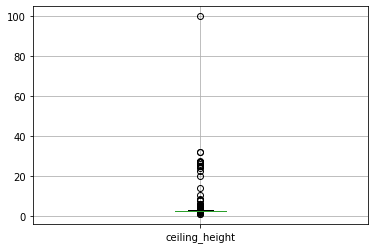

In [21]:
data.loc[:,['ceiling_height']].boxplot()


In [22]:
data = data[(data.ceiling_height > 2.0) & (data.ceiling_height < 5.0)].fillna(data['ceiling_height'].median())
data = data.reset_index(drop=True)

In [23]:
# Проверим, стало лучше
data['ceiling_height'].describe()


count    23648.000000
mean         2.696347
std          0.214689
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

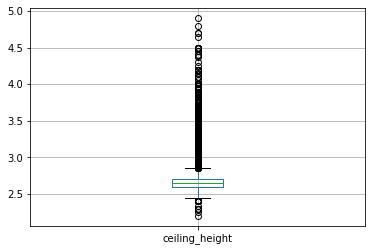

In [24]:
#  И боксплот. На боксплот видно, что после 4.5 это скорее выбросы. Но в принципе, всякое может быть
data.loc[:,['ceiling_height']].boxplot()

#### Удаление строк с неполными данными

В нашем дата-фрейме мы имеем некоторе колв-во строк с неполными данными. Как мы уже прикидывали, потеря небольшоего кол-ва строк (менее 10%) можно себе позволить потерять. Но в идеале конечно не превышать 5%-ой потери данных

***Колонка locality_name (название населённого пункта)***

Пропущеных значений по этой колонке всего 49 так как это значение не большое (точно укладывается в 5%), удалим пропуски


In [25]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

***Колонка floors_total (кол-во этажей)***

Востановить кол-во этажей в здании без знания точного адреса задача сложная. Так как пропущеных значений по полю floors_total = 86, удалим все эти значения

In [26]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в этих столбцах - это хорошее решение. 
</div>

#### Колонки с неполными данными оставленные без изменений

***Колонка days_exposition (сколько дней было размещено объявление (от публикации до снятия))***

Можем предположить, что отсутствие данных в этой колонке означает, что объявление о продаже еще не снято.

***Колонки с разными географическими данными***

У ряда колонок (список ниже) отсутствуют значения. Но удалять их нельзя, так как пропущенных значений очень много

- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- cityCenters_nearest (переименован в city_centers_nearest) — расстояние до центра города (м)
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

In [27]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
% NaN                   0
dtype: int64

#### Меняем Типы данных в столбцах и чистим неявные дубликаты

Еще раз посмотрим на столбцы и их тип

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23648 entries, 0 to 23647
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23648 non-null  int64  
 1   last_price            23648 non-null  float64
 2   total_area            23648 non-null  float64
 3   first_day_exposition  23648 non-null  object 
 4   rooms                 23648 non-null  int64  
 5   ceiling_height        23648 non-null  float64
 6   floors_total          23648 non-null  float64
 7   living_area           23648 non-null  float64
 8   floor                 23648 non-null  int64  
 9   is_apartment          23648 non-null  bool   
 10  studio                23648 non-null  bool   
 11  open_plan             23648 non-null  bool   
 12  kitchen_area          23648 non-null  float64
 13  balcony               23648 non-null  float64
 14  locality_name         23648 non-null  object 
 15  airports_nearest   

Изменим балконы на целые числа

In [29]:
data['balcony'] = data['balcony'].astype(int)

Аналогично поступим с кол-вом этажей

In [30]:
data['floors_total'] = data['floors_total'].astype(int)

Cтолбец first_day_exposition переведем в формат "дата"

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

Уберем нявные дубликаты в колонке locality_name

In [32]:
# Выведем кол-во уникальных значений. Бросается глаза поселок и посёлок

In [33]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [34]:
# Посчитаем кол-во уникальных названий
len(data['locality_name'].unique())

364

Заменим все "ё" на "е" и проверим как изменилось кол-во уникальных наименований

In [35]:
data['locality_name'] = data['locality_name'].str.replace("ё", "е", 2)
len(data['locality_name'].unique())

330

Почистим поселки

In [36]:
to_replace = {
    r'(\b)поселок городского типа(\b)':r'ПГТ',    
    r'(\b)городской поселок(\b)':r'ПГТ',
    r'(\b)коттеджный поселок(\b)':r'поселок'
}

data['locality_name'] = data['locality_name'].replace(to_replace, regex=True)
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'ПГТ Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'ПГТ Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'ПГТ Лебяжье', 'ПГТ Сиверский',
       'поселок Молодцово', 'ПГТ Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'ПГТ Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 

In [37]:
len(data['locality_name'].unique())

322

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Поиск редких и выбивающихся значений (аномалий) во всех столбцах

Тут мы будем пробовать строить боксплоты и гистограммы, чтобы понять, что можно удалить, а что нет. 

##### Колонка balcony

с ней мы разобрались выше


<AxesSubplot:>

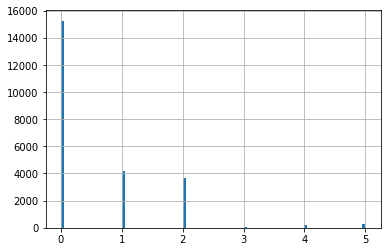

In [38]:
data['balcony'].hist(bins=100)


##### Колонка total_area 

In [39]:
data['total_area'].describe()

count    23648.00000
mean        60.32463
std         35.53352
min         12.00000
25%         40.00000
50%         52.00000
75%         69.90000
max        900.00000
Name: total_area, dtype: float64

<AxesSubplot:>

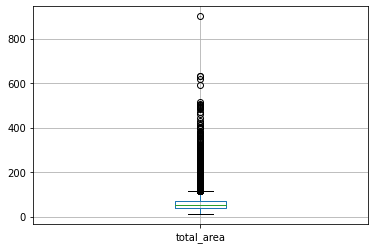

In [40]:
data.loc[:,['total_area']].boxplot()

<AxesSubplot:>

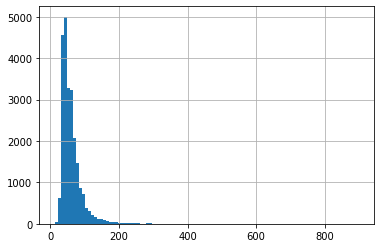

In [41]:
data['total_area'].hist(bins=100)

Из боксплота видно, что выбросы это значения выше примерно 450, посчитаем сколько их у нас (и сколько больше 200)

In [42]:
len([data['total_area']>470])



1

In [43]:
len([data['total_area']>200])

1

In [44]:
# Кол-во некритичное, можно удалить, однако лучше удалить больше 200 (совет ревьюера)

index = data[data['total_area'] > 200].index

data.drop(index, inplace=True)

# другой вариант удаления
# data = data.query(' 25 < total_area < 470 ')


In [45]:
# Проверим эффективность удаления
len([data['total_area']>200])

1

<AxesSubplot:>

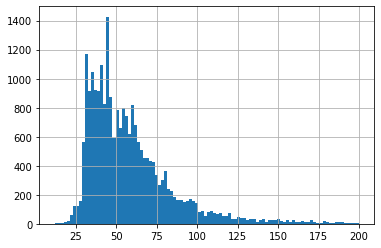

In [46]:
# Длинный хвост Long Taile
data['total_area'].hist(bins=100)

##### Столбец living_area (жилая площадь)

<AxesSubplot:>

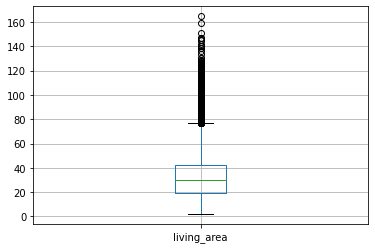

In [47]:
# выбросы примерно от 220 меттров
data.loc[:,['living_area']].boxplot()

<AxesSubplot:>

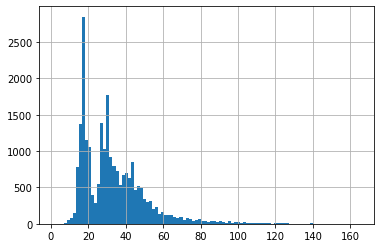

In [48]:
data['living_area'].hist(bins=100)

In [49]:
# Посчитаем их кол-во. 2 - некритично
len(data['living_area'][data['living_area']>270])

0

In [50]:
# Удалим их
data = data.query('living_area <= 270')

##### Столбец kitchen_area (площадь кухни)

<AxesSubplot:>

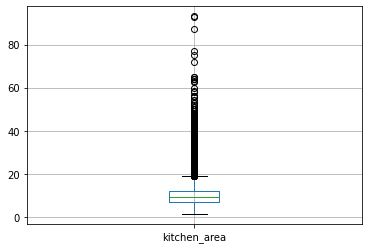

In [51]:
# выбросы примерно от 80 меттров
data.loc[:,['kitchen_area']].boxplot()

<AxesSubplot:>

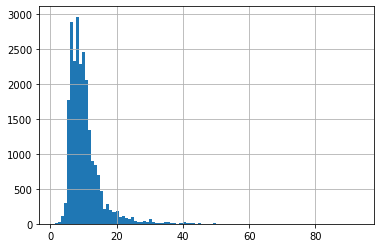

In [52]:
data['kitchen_area'].hist(bins=100)

In [53]:
# Посчитаем их кол-во. 5 - некритично
len(data['kitchen_area'][data['kitchen_area']>80])

3

In [54]:
data = data.query('kitchen_area <= 80')

##### Столбец rooms (количество комнат)

<AxesSubplot:>

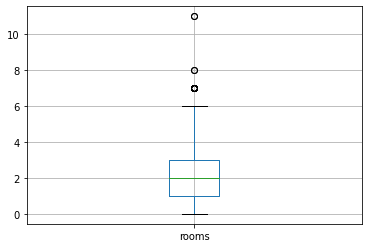

In [55]:
# выбросы примерно от 7 
data.loc[:,['rooms']].boxplot()

<AxesSubplot:>

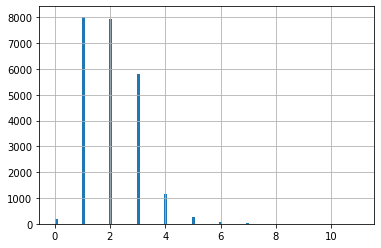

In [56]:
data['rooms'].hist(bins=100)

In [57]:
# Посчитаем их кол-во. 29 - некритично
len(data['rooms'][data['rooms']>7])

4

In [58]:
#  удалим
data = data.query('rooms <= 7')

##### Столбец floor (этаж квартиры)

<AxesSubplot:>

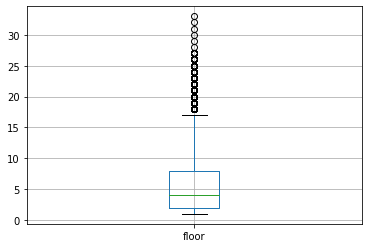

In [59]:
# выбросы примерно от 17 
data.loc[:,['floor']].boxplot()

<AxesSubplot:>

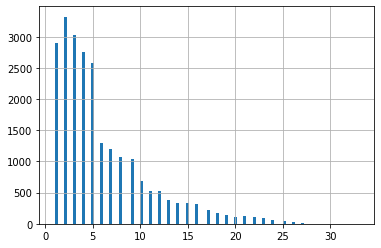

In [60]:
data['floor'].hist(bins=100)

In [61]:
# Посчитаем их кол-во. 920 удалять не будем
len(data['floor'][data['floor']>17])

918

##### Столбец floors_total (общее количество этажей в доме)

<AxesSubplot:>

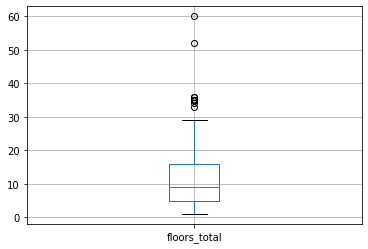

In [62]:
# выбросы примерно от 30 
data.loc[:,['floors_total']].boxplot()

<AxesSubplot:>

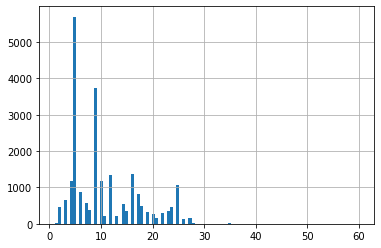

In [63]:
data['floors_total'].hist(bins=100)

In [64]:
# Посчитаем их кол-во. 30 - некритично
len(data['floors_total'][data['floors_total']>30])

30

In [65]:
# удалим
data = data.query('floors_total <= 30')

##### Столбец last_price (цена объекта)


<AxesSubplot:>

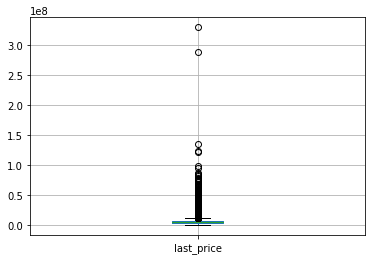

In [66]:
# выбросы примерно от 18  млн
data.loc[:,['last_price']].boxplot()

count    2.338700e+04
mean     6.011769e+06
std      6.153846e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

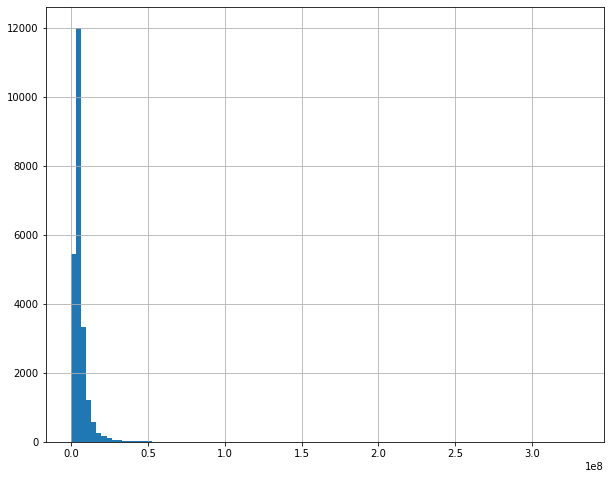

In [67]:
data['last_price'].hist(bins= 100, figsize=(10,8))
data['last_price'].describe()

In [68]:
# Посчитаем их кол-во. 808 удалять не будем
len(data['last_price'][data['last_price']>18_000_000])

655

#### Результаты проведенной предобработки данных

В результате проведенной предобработки были заполнены пропуски, удалены некоторые строки с неполными данными, часть строк с неполными данными оставлены. Была проведена работа по изменению типов данных в нескольких колонках.

Кроме того, была проведена работа по поиску и удалению аномальных значений статистическими методами.

Посмотрим сколько строк у нас осталось



In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23387 entries, 0 to 23647
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23387 non-null  int64         
 1   last_price            23387 non-null  float64       
 2   total_area            23387 non-null  float64       
 3   first_day_exposition  23387 non-null  datetime64[ns]
 4   rooms                 23387 non-null  int64         
 5   ceiling_height        23387 non-null  float64       
 6   floors_total          23387 non-null  int64         
 7   living_area           23387 non-null  float64       
 8   floor                 23387 non-null  int64         
 9   is_apartment          23387 non-null  bool          
 10  studio                23387 non-null  bool          
 11  open_plan             23387 non-null  bool          
 12  kitchen_area          23387 non-null  float64       
 13  balcony         

Было 23699, осталось 23387, то есть было удалено 312 строки, что составляет 1,32%.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Аномалии удалены, но вот границы этих аномалий подобраны не совсем верно. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить.
</div>



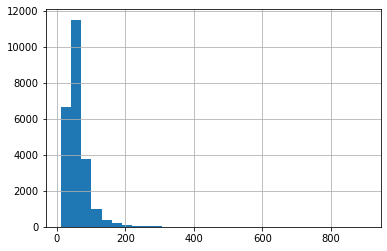

In [70]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
 Удалил площадь больше 200 метров
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [71]:
# Делим цену на площадь, и запишем полученные значения в новый столбец:
data['m2_price'] = data['last_price'] / data['total_area'] / 1000

data['m2_price'].describe()

count    23387.000000
mean        98.360034
std         45.324233
min          0.111835
25%         76.500000
50%         94.818653
75%        113.864985
max       1736.842105
Name: m2_price, dtype: float64

#### День недели публикации объявления

In [72]:
# Добавим столбец с днями недели:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].describe()

count    23387.000000
mean         2.567837
std          1.790311
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

#### Месяц публикации объявления

In [73]:
#Добавим столбец с днями недели:
data['month'] = data['first_day_exposition'].dt.month
data['month'].describe()

count    23387.000000
mean         6.400094
std          3.491246
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

#### Год публикации объявления


In [74]:
data['year'] = data['first_day_exposition'].dt.year
sorted(data['year'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

#### Тип этажа квартиры

In [75]:
# Используем функцию

def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другие'

data['type_floor'] = data.apply(type_floor, axis=1)

In [76]:
# Проверим что получилось (первый, последний - не предлагать)
data['type_floor'].value_counts()

другие       17238
последний     3253
первый        2896
Name: type_floor, dtype: int64

In [77]:
data[['type_floor','floor','floors_total']].head(20)

,type_floor,floor,floors_total
0,другие,8,16
1,первый,1,11
2,другие,4,5
3,другие,9,14
4,другие,13,14
5,другие,5,12
6,другие,6,26
7,другие,22,24
8,другие,26,27
9,другие,7,9


#### Расстояние до центра города в километрах

In [78]:
# Переводим из м в км и округлям до целых значений
# так не получится data['distance_city_center'] = data (round ( (['city_centers_nearest'] / 1000) ), 0)

# Переводим из м в км 
data['distance_city_center'] = data['city_centers_nearest']/1000

In [79]:
# Округляем до целых значений
def round_distance(valume):
    if pd.isna(valume):
        return valume
    else:
        return round(valume)

data['distance_city_center'] = data['distance_city_center'].apply(round_distance)

In [80]:
data['distance_city_center'].describe()

count    23387.000000
mean        10.915979
std          9.652612
min          0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         66.000000
Name: distance_city_center, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Описательная статистика и гистограммы

##### Общая площадь (total_area)

count    23387.000000
mean        58.148158
std         26.457754
min         12.000000
25%         40.000000
50%         51.800000
75%         68.890000
max        200.000000
Name: total_area, dtype: float64

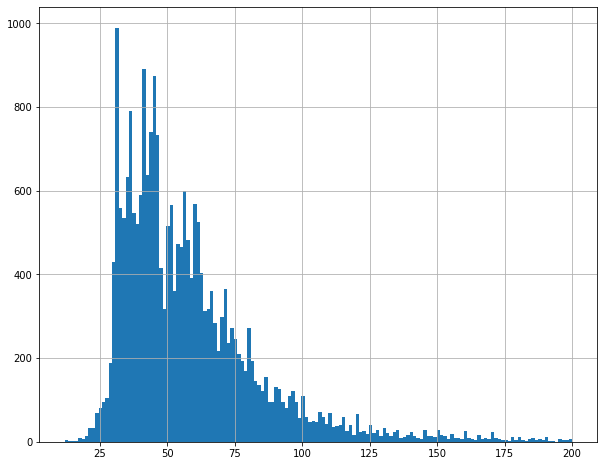

In [81]:
data['total_area'].hist(bins=150, figsize=(10,8))
data['total_area'].describe()

Распределение данных близко к нормальному.Выбросы есть, но не критичны. Основная масса квартир выставленных на продажу имеет площадь от 40 квадратных метра до 68.9, медиана 51.9.

#####  Жилая площадь(living_area)

count    23387.000000
mean        33.317927
std         17.254177
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

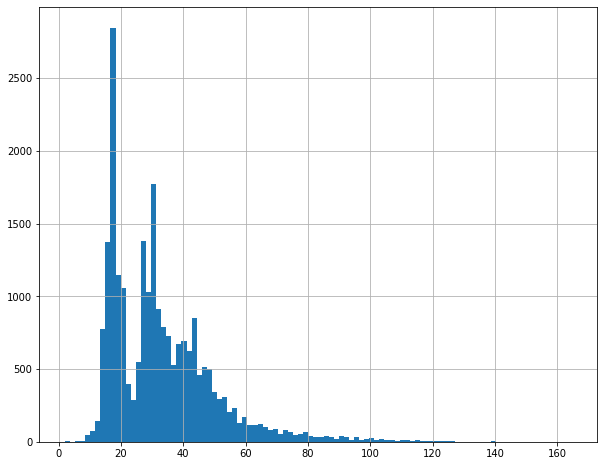

In [82]:
data['living_area'].hist(bins=100, figsize=(10,8))
data['living_area'].describe()

Жилая площадь распределение близко к нормальному. Преобладают квартиры с жилой площадью от 19 до 42.1, со медианой 30, однако есть интересные пики, посмотрим внимательней

In [83]:
data['living_area'].value_counts()

18.000000    881
17.000000    673
30.000000    595
16.000000    485
20.000000    479
            ... 
19.892308      1
29.740000      1
15.130000      1
70.673077      1
18.351923      1
Name: living_area, Length: 2279, dtype: int64

Судя по всему это пики связанные с кол-вом комнат и типовой площадью типового жилья

##### Площадь кухни (kitchen_area)

count    23387.00000
mean        10.27286
std          5.25861
min          1.30000
25%          7.00000
50%          9.00000
75%         11.80000
max         77.00000
Name: kitchen_area, dtype: float64

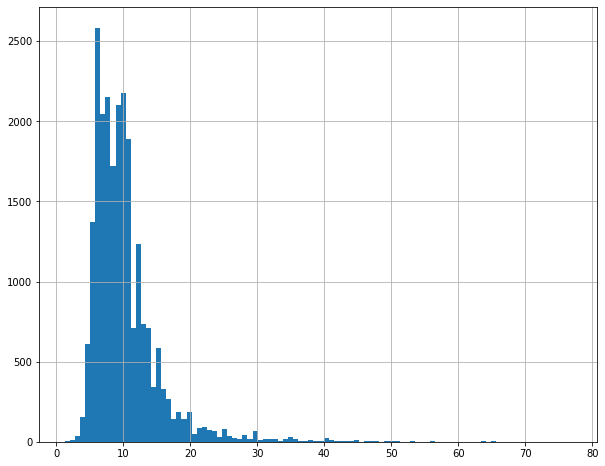

In [84]:
data['kitchen_area'].hist(bins=100, figsize=(10,8))
data ['kitchen_area'].describe()

Распределение близко к нормальному. Основная масса квартир с площадью кухни от 7 квадратных метров до 11.8, с медианой в 9.

##### Цена продажи (last_price)

count    23387.000000
mean         6.011769
std          6.153846
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price_mln, dtype: float64

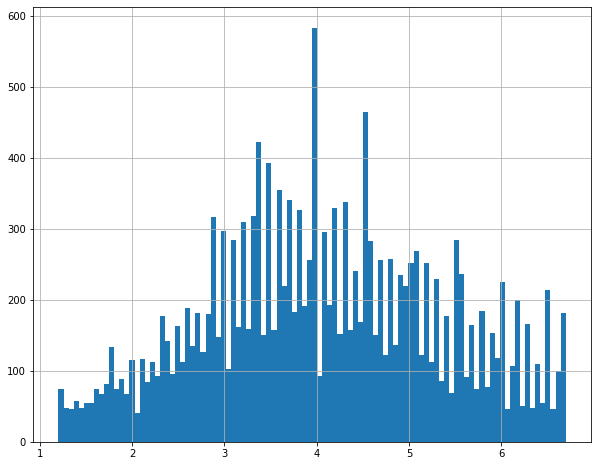

In [85]:
# Добавим колонку "в миллионах"  и построим по ней график
data['last_price_mln'] = data['last_price']/1000000
data['last_price_mln'].hist(bins= 100, figsize=(10,8), range = (1.2, 6.7))
data['last_price_mln'].describe()

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут необходимо поиграться с параметром range, чтобы график стал более понятным, а если ещё разделить все значения на 1млн, то будет совсем хорошо)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил колонку с миллионами и параметр range
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Распределение близко к нормальному. Основная масса квартир продается в диапазоне от 3.4 млн до 6.75 млн. Медиана - 4.6 млн. Посмотрим еще на цены подробнее

In [86]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4200000.0     259
4000000.0     259
4300000.0     258
             ... 
9917600.0       1
3180500.0       1
7297000.0       1
31490000.0      1
4386000.0       1
Name: last_price, Length: 2876, dtype: int64

Видимо эти круглые суммы (4,5 млн, 3,5 млнн и тд) связаны с предложениями крупных застройщиков

##### Кол-во комнат (rooms)

count    23387.000000
mean         2.034122
std          0.991126
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

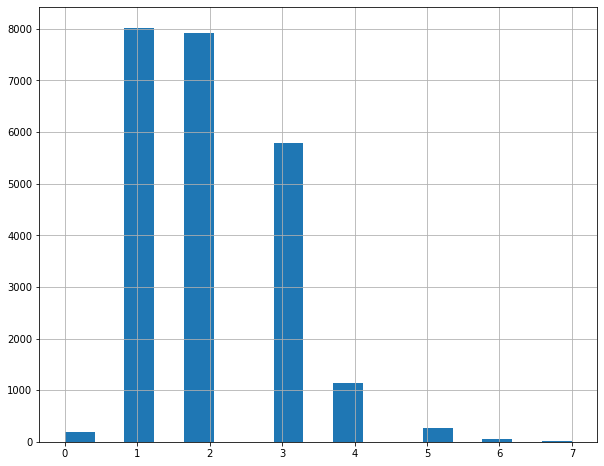

In [87]:
data['rooms'].hist(bins=17, figsize=(10,8))
data['rooms'].describe()

В основном в продаже стандартные 1-3 комнатные квартиры. Медиана - 2 комнаты

##### Высота потолков (ceiling_height)

count    23387.000000
mean         2.692174
std          0.205488
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

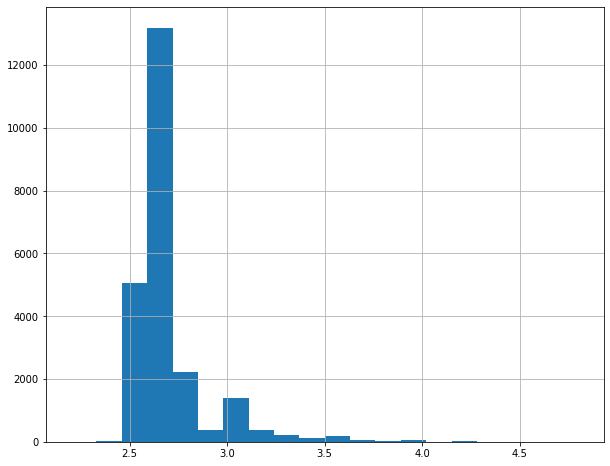

In [88]:
data['ceiling_height'].hist(bins=20, figsize=(10,8))
data['ceiling_height'].describe()

Основная масса квартир со стандарной высотой потолков - 2.6 - 2.7 с медианой 2.65

##### Этажность (floor)

count    23387.000000
mean         5.888015
std          4.867349
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

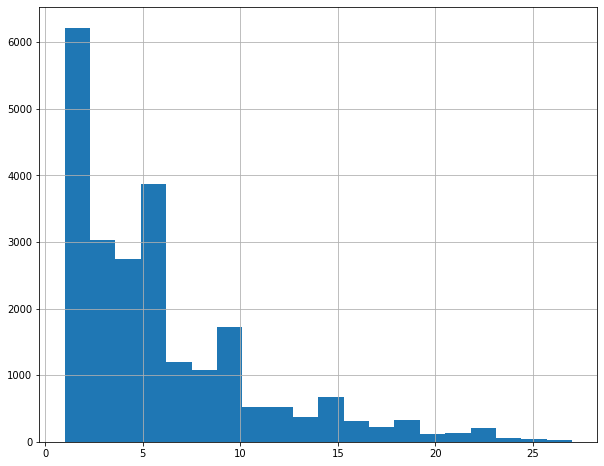

In [89]:
data['floor'].hist(bins=20, figsize=(10,8))
data['floor'].describe()

Основная масса лежит в пределах от 2 до 8 этажей с медианой в 4

##### Первый, последний, другие(type_floor)

другие       17238
последний     3253
первый        2896
Name: type_floor, dtype: int64

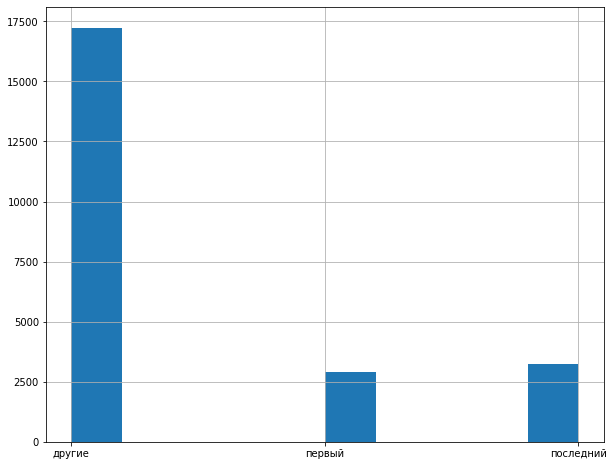

In [90]:
data['type_floor'].hist(figsize=(10,8))
data['type_floor'].value_counts()

Основная масса это конечно "другие". Однако, интересно, что последних этажей больше, чем первых

##### Всего этажей в доме (floors_total)

count    23387.000000
mean        10.653654
std          6.548749
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

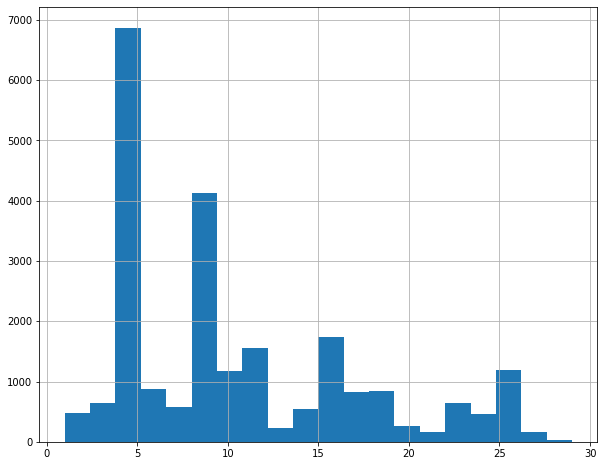

In [91]:
data['floors_total'].hist(bins=20, figsize=(10,8))
data['floors_total'].describe()


In [92]:
data['floors_total'].value_counts() 

5     5700
9     3749
16    1368
12    1356
4     1169
10    1169
25    1073
6      870
17     826
3      649
7      571
14     551
18     503
24     468
2      457
8      377
15     364
23     352
19     337
22     286
20     269
13     228
11     202
27     164
21     158
26     124
1       25
28      21
29       1
Name: floors_total, dtype: int64

Здесь мы видимо реальности застройки типовым жильем, пики у 5-и и 9-и этажей

##### Расстояние до центра города (city_centers_nearest)

count    23387.000000
mean     10921.415733
std       9647.646202
min          2.650000
25%       2166.500000
50%      11313.000000
75%      15264.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

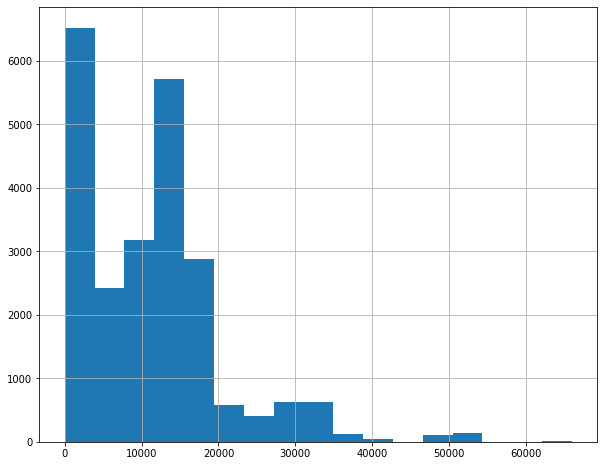

In [93]:
data['city_centers_nearest'].hist(bins=17, figsize=(10,8))
data['city_centers_nearest'].describe()

Основная масса жилья находится в диапазоне от 2231 до 15245, с медианой в 11км, а первый пик это наши пропуски данных

##### Расстояние до ближайшего аэропорта (airports_nearest)

count    23387.000000
mean     22040.497873
std      16515.295508
min          0.000000
25%      10031.000000
50%      21793.000000
75%      34491.000000
max      84869.000000
Name: airports_nearest, dtype: float64

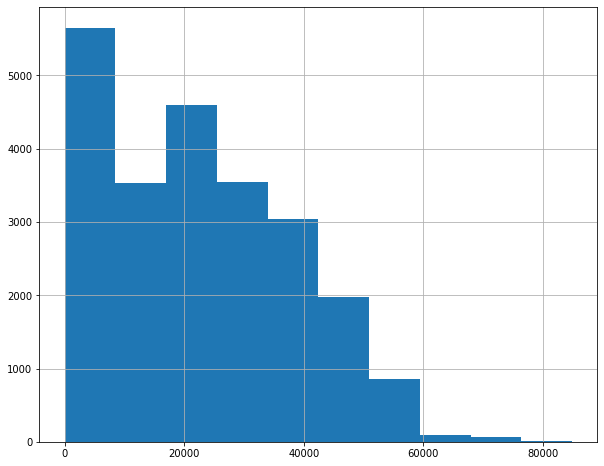

In [94]:
data['airports_nearest'].hist(figsize=(10,8))
data['airports_nearest'].describe()

Аэропорты находятся дальше, чем центр. Основная масса жилья находится от 10 км до 34 км с медианой в 21,9 км

##### Расстояние до ближайшего парка (parks_nearest)

count    23387.000000
mean       168.076893
std        305.698653
min          1.000000
25%          2.650000
50%          2.650000
75%        295.000000
max       3190.000000
Name: parks_nearest, dtype: float64

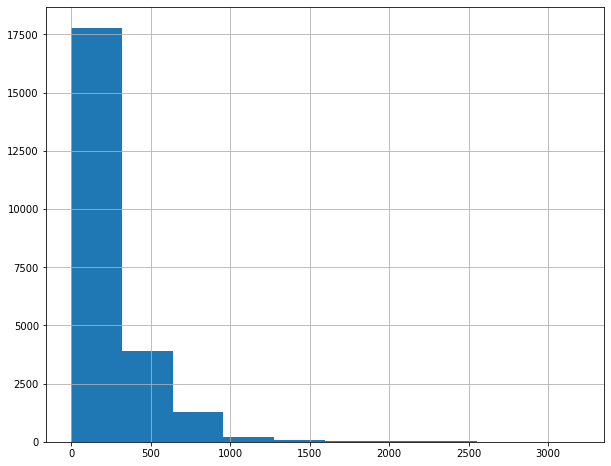

In [95]:
data['parks_nearest'].hist(figsize=(10,8))
data['parks_nearest'].describe()

С парками ситуация неплохая, буквально в пешей доступности. Однако картину портят пропущенные значения

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

#### Как быстро продавались квартиры 

##### Как долго висело объявление (days_exposition)

count    23387.000000
mean       156.218106
std        212.114979
min          1.000000
25%         23.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

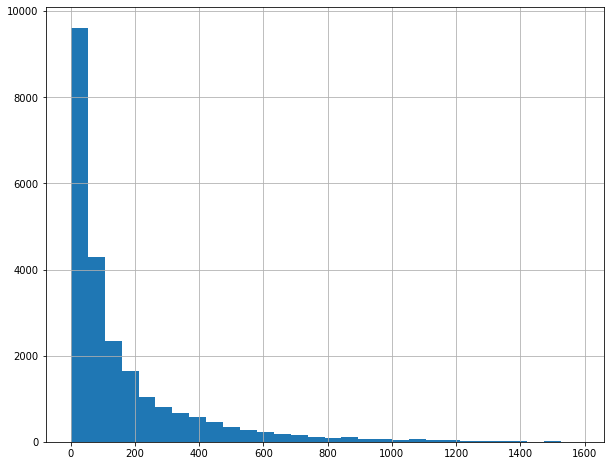

In [96]:
data['days_exposition'].hist(bins=30, figsize=(10,8))
data['days_exposition'].describe()

Основная масса квартир продается в диапазоне от 23-х до 198 дней, однако проверим еще одну гипотезу

In [97]:
data['days_exposition'].value_counts()

2.65       3109
45.00       877
60.00       538
7.00        231
30.00       206
           ... 
1147.00       1
1148.00       1
1345.00       1
994.00        1
1174.00       1
Name: days_exposition, Length: 1133, dtype: int64

Очень много снимается через 2.65, 45, 60, 7 и 30 дней, видимо это автоматические настройки данного сайта

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметил эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

В целом можно сказать, что быстрая продажа это меньше первого квартиля, то есть меньше 23-х дней. А долгая продажа - больше третьего квартиля, то есть больше 198 дней

##### Месяц публикации

count    23387.000000
mean         6.400094
std          3.491246
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

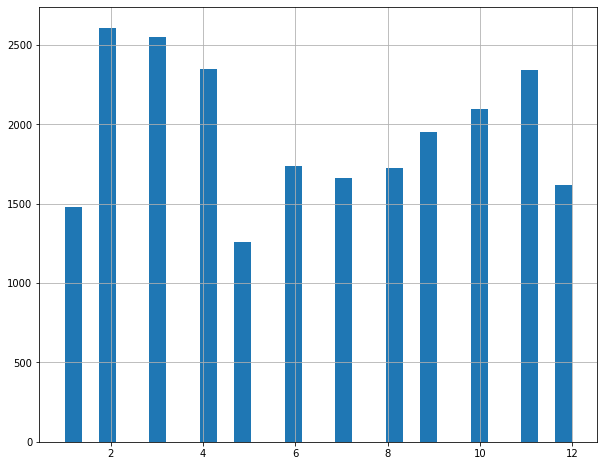

In [98]:
data['month'].hist(bins=30, figsize=(10,8))
data['month'].describe()

На гистограмме видно, что просадки публикаций объявлений есть в мае, январе  и летом в целом

##### День недели размещения объявления

count    23387.000000
mean         2.567837
std          1.790311
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

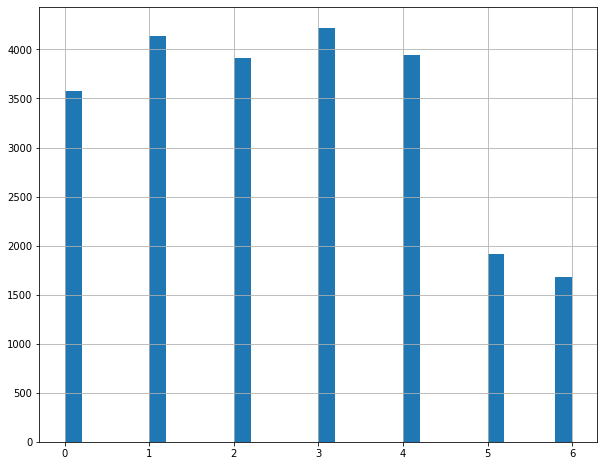

In [99]:
data['weekday'].hist(bins=30, figsize=(10,8))
data['weekday'].describe()

На гистограмме видно, что просадки публикаций объявлений на выходных днях. Это и понятно, риелторы тоже отдыхают (или наоборот, заняты показами квартир)

#### Факторы влияющие на общую (полную) стоимость объекта

Изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

#### Общая площадь и цена

<AxesSubplot:xlabel='total_area'>

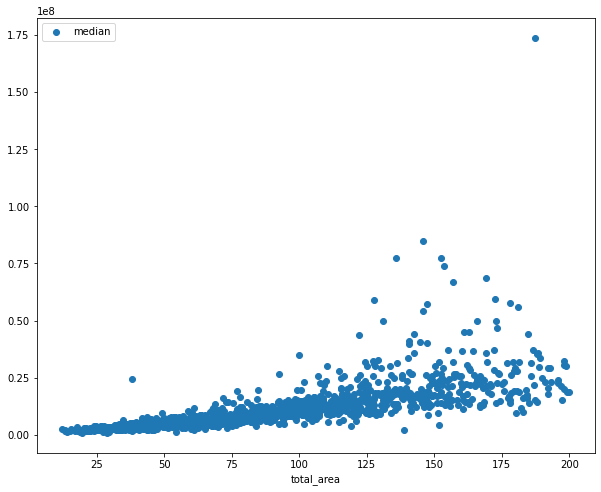

In [100]:
pivot_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [101]:
data['last_price'].corr(data['total_area'])

0.6596323466030534

**Вывод:** коэфициент корреляции Пирсона 0.61 (средний уровень) Чем больше общая площадь, тем выше стоимость квартиры. Это довольно очевидно

#### Зависит ли цена от жилой площади

<AxesSubplot:xlabel='living_area'>

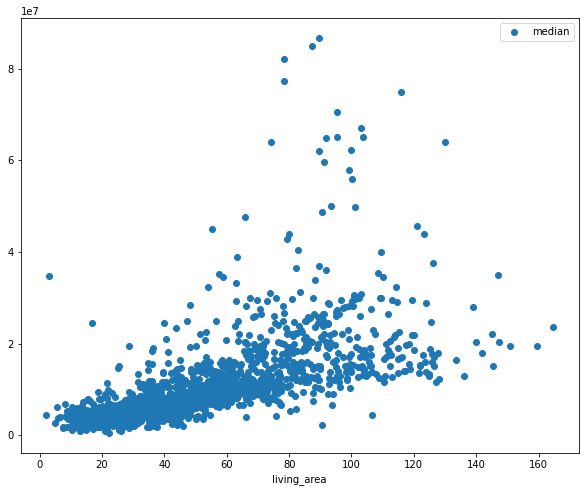

In [102]:
pivot_total_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [103]:
data['last_price'].corr(data['living_area'])

0.5567892724668314

**Вывод:** коэфициент корреляции Пирсона 0.55 (средний уровень) Чем больше жилая площадь, тем выше стоимость квартиры.

##### Зависит ли цена квартиры от площади кухни

<AxesSubplot:xlabel='kitchen_area'>

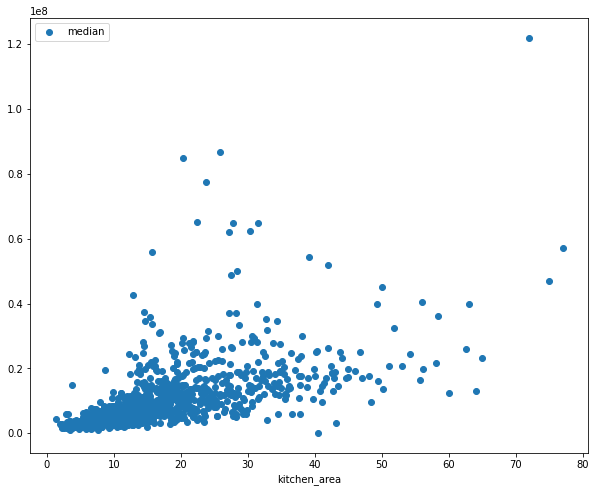

In [104]:
pivot_total_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [105]:
data['last_price'].corr(data['kitchen_area'])

0.5311174170607893

**Вывод:** коэфициент корреляции Пирсона 0.48 (средний уровень) Чем больше кухня, тем выше стоимость квартиры.

##### Цена и количество комнат

<AxesSubplot:xlabel='rooms'>

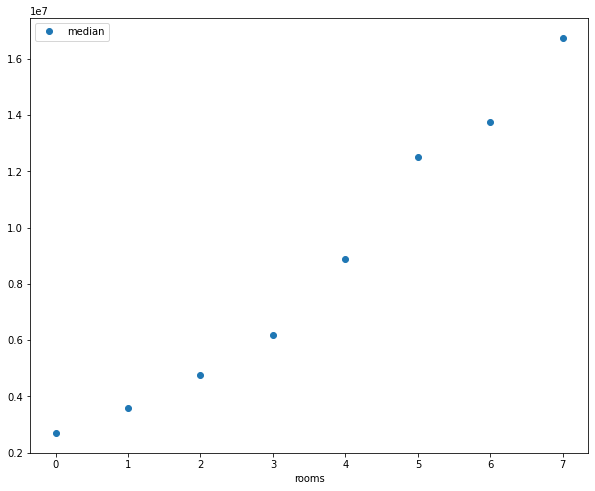

In [106]:
pivot_total_area = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [107]:
data['last_price'].corr(data['rooms'])

0.38184207618346566

**Вывод:** коэфициент корреляции Пирсона 0.34 (низкий уровень). Тем не менее, больше комнат  -  выше цена квартиры. Слабая корреляция может объясняться тем, что (исхожу из рынка Москвы), что старый фонд может быть трешка на 60-и квадртах, а новый фонд - это будет скорее двушка. А с точки зрения цены - покупатели ориентируются стоимостью конечной (ну или за 1 метр)

##### Цена квартиры и этаж

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

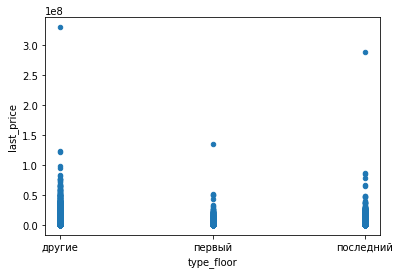

In [108]:
data.plot(x='type_floor', y='last_price', kind='scatter')

(0.0, 20000000.0)

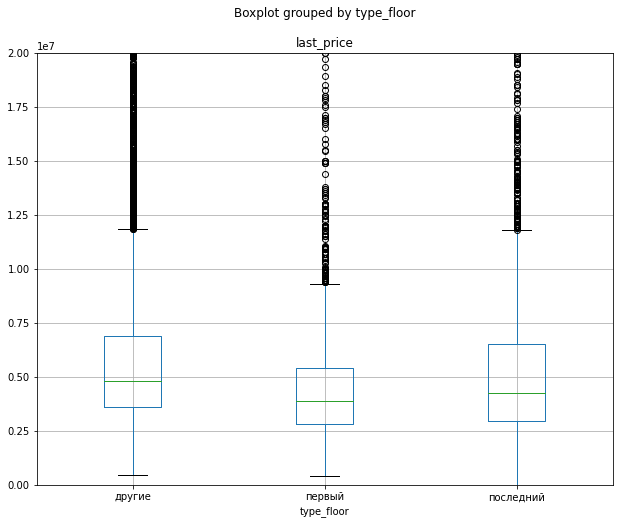

In [109]:
data.boxplot('last_price', by='type_floor',figsize=(10,8)).set_ylim(0,20000000)

**Вывод:** зависимости не выявлено, однако медиана у первого и последнего этажей ниже, чем у других

##### День недели и стоимость квартиры

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

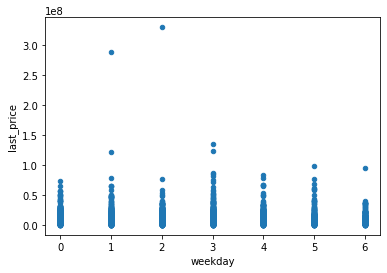

In [110]:
data.plot(x='weekday', y='last_price', kind='scatter')

(0.0, 20000000.0)

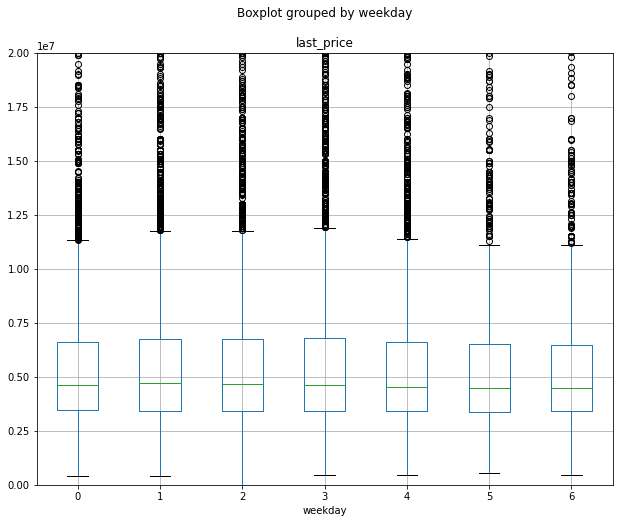

In [111]:
data.boxplot('last_price', by='weekday',figsize=(10,8)).set_ylim(0,20000000)

**Вывод:** зависимости не выявлено

##### Месяц и стоимость квартиры

<AxesSubplot:xlabel='month', ylabel='last_price'>

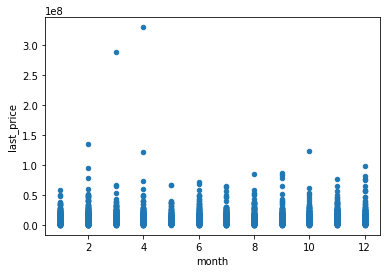

In [112]:
data.plot(x='month', y='last_price', kind='scatter')

(0.0, 20000000.0)

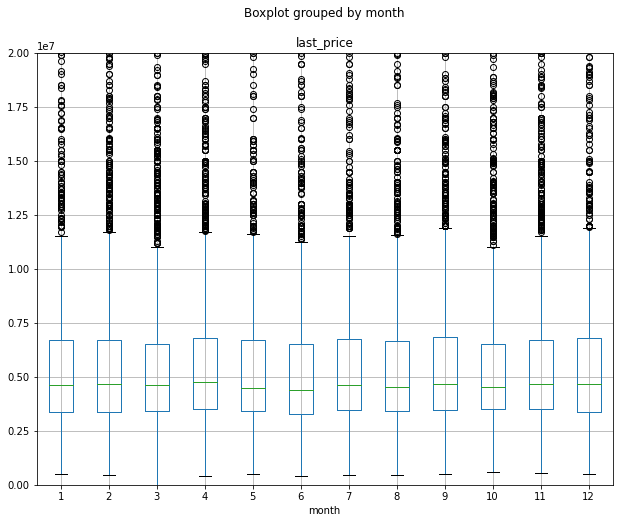

In [113]:
data.boxplot('last_price', by='month',figsize=(10,8)).set_ylim(0,20000000)

**Вывод:** зависимости не выявлено

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Изучить зависимость цены от дня недели и месяца публикации нужно таким же способом как ты изучаешь зависимость цены от категории этажа (через боксплот)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил боксплоты для месяца и дня недели
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

##### Год и стоимость квартиры

(0.0, 30000000.0)

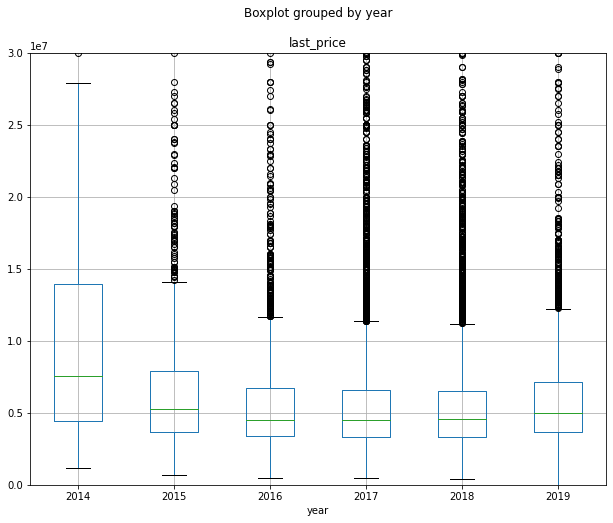

In [114]:
data.boxplot('last_price', by='year',figsize=(10,8)).set_ylim(0,30000000)

**Вывод:** судя по графику, самые дорогие квартиры были в 2014 году, потом началось снижение цены до 2017 года и совсем не большой рост в 2019. Что в принципе отражает что происходило в стране. Если бы у нас были бы свежие данные, мы были увидели еще и сильный рост в последние годы вызванный разными факторами

#### Средняя цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра


In [115]:
# Сначала отберем 10 населенных пунктов с наибольшим числом объявлений, и запишем список в переменную top_10:
top_10 = data['locality_name'].value_counts().index[0:10]
top_10

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

In [116]:
# Посмотрим среднюю цену в каждом из населенных пунктов списка из Топ-10:
(data
     .query('locality_name in @top_10')
     .pivot_table(index='locality_name', values='m2_price', aggfunc='mean')
     .sort_values(by='m2_price',ascending=False))

,m2_price
locality_name,
Санкт-Петербург,113.435320
Пушкин,103.122539
деревня Кудрово,92.473548
поселок Парголово,90.332263
поселок Мурино,85.656214
поселок Шушары,78.677364
Колпино,75.333296
Гатчина,68.757679
Всеволожск,68.719320


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

Определим самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту:

In [117]:
min_price = data.groupby('locality_name')['m2_price'].mean().min()
max_price = data.groupby('locality_name')['m2_price'].mean().max()

Посмотрим, в каком населенном пункте самые высокие цены на недвижимость:

In [118]:
data.pivot_table(index='locality_name', values='m2_price', aggfunc='mean').query('m2_price == @max_price')

,m2_price
locality_name,
Зеленогорск,115.122799


Посмотрим, в каком населенном пункте самые низкие цены на недвижимость:

In [119]:
data.pivot_table(index='locality_name', values='m2_price', aggfunc='mean').query('m2_price == @min_price')

,m2_price
locality_name,
деревня Старополье,11.206221


**Вывод:** Как и следовало ожидать, лидером по количеству объявлений является Санкт-Петербург. Минимальные цены обнаружены в одной из деревень - тоже вполне ожидаемо. Неожиданным лидером по средней цене квадратного метра оказался Зеленогорск: однако это можно объяснить тем, что  Зеленогорск - внутригородское муниципальное образование в составе Курортного района Санкт-Петербурга

#### Квартиры в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города

<AxesSubplot:xlabel='distance_city_center', ylabel='m2_price'>

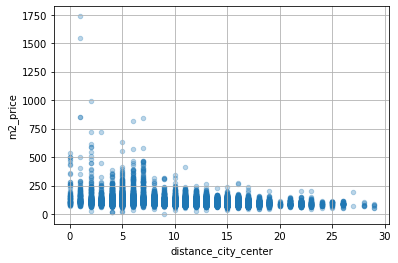

In [120]:
# Построим диаграмму рассеяния для цены квадратного метра в Петербурге в зависимости от расстояния от центра города:
(data[data['locality_name'] == 'Санкт-Петербург']
       .plot(
           x='distance_city_center',
           y='m2_price',
           kind='scatter',
           grid=True,
           alpha=0.3))

<AxesSubplot:xlabel='km'>

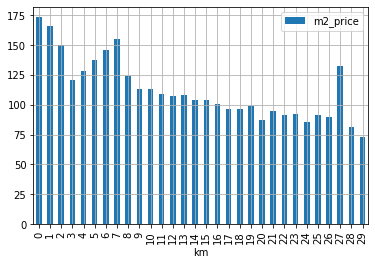

In [121]:
# И столбчатую диаграмму со значением средней цены для каждого из километра:
SPb = (data[data['locality_name'] == 'Санкт-Петербург']
       .pivot_table(index='distance_city_center', values='m2_price', aggfunc='mean'))
SPb['km'] = SPb.index.astype('int')
SPb.plot( x='km', y='m2_price', kind='bar', grid=True)

In [122]:
print(SPb['km'].corr(SPb['m2_price']))

-0.8281744946823636


**Вывод:** Чем дальше от центра, тем ниже цена. На графике после 8 км заметно, что цена меняется. Это возможная граница центра города. Резкое поднятие цены в районе 6км - возможно дорогой район "Золотая миля" или что-то типа того. Коэффициент корреляции Пирсона довольно высокий и также подтверждает основной вывод. Удаленность отрицательно коррелирует с ценой за метр.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

#### Предобработка данных
Была проведена работа по заполнению пропусков в ряде колонок (balcony, is_apartment, kitchen_area, living_area, ceiling_height),  Удалены строк с неполными данными в колонке locality_name. Часть колонок с пропущенными данными оставлены без изменений, в связи с большим количеством отсутствующих значений (parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, сity_centers_nearest и airports_nearest)

Изменены тип данных в колонках (balcony, floors_total, first_day_exposition)

Проведен поиск и устранение аномалий и выбросов в колонках (total_area, living_area, kitchen_area, rooms, floors_total)

В результате проведенной предобработки были заполнены пропуски, удалены некоторые строки с неполными данными, часть строк с неполными данными оставлены. Была проведена работа по изменению типов данных в нескольких колонках.

Кроме того, была проведена работа по поиску и удалению аномальных значений статистическими методами. 
Потеря данных составило 312 строки, что составляет 1,32% от изначального датасета.

#### Добавление новых столбцов

Для удобства анализа были добавлены следующие столбцы:
* цена одного квадратного метра
* день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры (значения — «первый», «последний», «другой»)
* расстояние в км до центра города

#### Исследовательский анализ
Исследовательский анализ данных включал в себя проведение анализа с помощью описательной статистики и построения диаграмм для следующих столбцов

 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - этаж квартиры;
 - тип этажа квартиры («первый», «последний», «другой»);
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего аэропорта;
 - расстояние до ближайшего парка;
 - день и месяц публикации объявления

#### Как быстро продавались квартиры

Было изучено сколько дней висели объявления, изучено влияние дня недели и месяца на размещение объявлений. Обнаружены закономерности сроков размещений объявлений связанные с работой сервиса.

#### Факторы влияющие на стоимость жилья

Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта, построены графики и сводные таблицы.
Факторы влияющие на стоимость жилья следующие:

1.  Общей площади квартиры.
2.  Размер жилой площади квартиры.
3.  Размер площади кухни.
4.  Количества комнат.
5.  Удаленность от центра -  влияет, но обратно (чем дальше от центра, тем ниже цена за квадратный метр).

Дополнительно было выявлено, что самое большое кол-во объявлений в Санкт-Петербурге, также там и самая высокая цена квадратного метра. Самая низкая цена за квадратный метр в деревне ЛО.

#### Итого
Было проведено исследование рынка недвижимости Санкт-Петербурга. В процессе которого была выполнена предобработка данных, включающая в себя работу с пропусками и неполными данными, поиск аномальных значений. Также были добавлены ряд дополнительных  столбцов. После этого был проведен исследовательский анализ данных о влиянии разных факторов на стоимость жилья.


<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>